<a href="https://colab.research.google.com/github/danielav081596/Proyecto_Integrador_Equipo5/blob/main/Copia_de_Avance2_Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Instituto Tecnológico y de Estudios Superiores de Monterrey**

##**Maestría en Inteligencia Artificial Aplicada**

### TC5035.10 Proyecto Integrador - "Modelación y predicción del impacto de las experiencias benevolentes en la infancia en las Condiciones de Bienestar Emocional (BCEs) en niños y adultos mexicanos"


#### Dra. Grettel Barceló Alonso - Asesor del proyecto

*Avance 1. Análisis exploratorio de datos*


**Equipo # 5**
* Karla Daniela Valenzuela A00819192
* Emmanuel Domínguez Bravo A01793683

En este primer avance realizamos un análisis exploratorio de los datos (EDA - Exploratory Data Analysis) donde examinamos los datos disponibles para encontrar patrones, detectar anomalías así como aplicar técnicas estadísticas para verificar premisas (Suresh & Usman, 2020) que nos sirvan como referencia para aplicar y justificar operaciones de preprocesamiento, necesarias para la correcta implementación de los modelos de aprendizaje automático correspondientes.

En el presente trabajo tomamos la base de datos proporcionada que consideraremos como los datos de entrenamiento, que consisten en las respuestas de salida de encuestas realizadas a un grupo de adultos que presentan ciertas patologías psicológicas. Los datos etiquetados los estaremos utilizando para entrenar modelos de clasificación multi-clase y multi-salida que aplicados a un conjunto de datos separado de encuestas realizadas a un grupo de niños, clasificar si de acuerdo con sus experiencias negativas y positivas vividas hasta ahora, presentarán un riesgo de padecer alguna de las patologías presentadas en el grupo de adultos.

In [ ]:
#!pip install pyreadstat

In [ ]:
# importamos las librerías requeridas

import numpy as np
import pandas as pd
#import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install prince

In [ ]:
! git clone https://github.com/danielav081596/Proyecto_Integrador_Equipo5.git

fatal: destination path 'Proyecto_Integrador_Equipo5' already exists and is not an empty directory.


In [ ]:
# Leemos los archivos con extensión .sav que se nos proporcionaron
#df_adultos, meta = pyreadstat.read_sav('/content/2.1.Base de ACES_Adultos.sav')
#df_menores, meta = pyreadstat.read_sav('/content/2.2.Base de ACES_Menores.sav')

# Escribimos los datos en un archivo .csv
#df_adultos.to_csv('ACEs Adultos.csv', index=False)

In [ ]:
# Creamos un dataframe del archivo .csv

df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


<ipython-input-6-2ec3293ece57>:3: DtypeWarning: Columns (87,525,538,539,540) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


In [ ]:
# La base de datos tiene 689 columnas:

df_adultos.head()

,FOLIO,FOLIO2,ID_ADULTO,TELEFONO,CORREO,BINOMIO,FILTRO,ENT,ENTIDAD,MUN,...,EDAD,INDIGENA,RELIGION,ESCOLARIDAD,NSEF,NSE5F,UPM,RURAL,PONDERADOR,AREA
0,0100108639999001-01,0100108639999001-01,1.0,4.493858e+09,yeimider1@gmail.com,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
1,0100108639999001-02,0100108639999001-02,3.0,4.495684e+09,NaN,0,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
2,0100108639999001-03,0100108639999001-03,1.0,4.494059e+09,Betomartiez89@gmail.com,1,2,1,AGUASCALIENTES,1,...,30.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
3,0100108639999001-04,0100108639999001-04,1.0,4.496682e+09,NaN,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,1.0,1.0,0100108639999,1.0,18619.783203,1.0
4,0100108639999001-05,0100108639999001-05,1.0,4.492521e+09,NaN,1,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,2.0,3.0,0100108639999,1.0,18619.783203,1.0


In [ ]:
#!pip install git+https://github.com/Cauchemare/Light_FAMD.git

In [ ]:
#pip install git+https://github.com/MaxHalford/Prince

In [ ]:
# Renombramos columnas para facilitar su identificación

survey = {'AD_M07_50':"Seguridad alimentaria 2",'AD_M07_51':"Seguridad alimentaria 3",'AD_M07_52':"Seguridad alimentaria 4",
                     'AD_M07_53':"Seguridad alimentaria 5",'AD_M07_54':"Seguridad alimentaria 6",'AD_M07_55':"Seguridad alimentaria 7",
                     'AD_M09_95_01_1':"comportamiento_riesgo 1",'AD_M09_95_01_2':"comportamiento_riesgo 2",'AD_M09_95_01_3':"comportamiento_riesgo 3",'AD_M09_95_01_4':"comportamiento_riesgo 4",
                     'AD_M09_95_02_1':"comportamiento_riesgo 5",'AD_M09_95_02_2':"comportamiento_riesgo 6",'AD_M09_95_02_3':"comportamiento_riesgo 7",'AD_M09_95_02_4':"comportamiento_riesgo 8",
                     'AD_M09_95_03_1':"comportamiento_riesgo 9",'AD_M09_95_03_2':"comportamiento_riesgo 10",'AD_M09_95_03_3':"comportamiento_riesgo 11",'AD_M09_95_03_4':"comportamiento_riesgo 12",
                     'AD_M09_95_04_1':"comportamiento_riesgo 13",'AD_M09_95_04_2':"comportamiento_riesgo 14",'AD_M09_95_04_3':"comportamiento_riesgo 15",'AD_M09_95_04_4':"comportamiento_riesgo 16",
                     'AD_M09_95_05_1':"comportamiento_riesgo 17",'AD_M09_95_05_2':"comportamiento_riesgo 18",'AD_M09_95_05_3':"comportamiento_riesgo 19",'AD_M09_95_05_4':"comportamiento_riesgo 20",
                     'AD_M09_95_06_1':"comportamiento_riesgo 21",'AD_M09_95_06_2':"comportamiento_riesgo 22",'AD_M09_95_06_3':"comportamiento_riesgo 23",'AD_M09_95_06_4':"comportamiento_riesgo 24",
                     'AD_M09_96_01_1':"Depresión",'AD_M09_96_02_1':"Trastorno Bipolar",'AD_M09_96_03_1':"Ezquizofrenia",'AD_M09_96_04_1':"Estrés postrauma",
                     'AD_M09_96_05_1':"Anorexia Nerviosa",'AD_M09_96_06_1':"Bulimia Nerviosa",'AD_M09_96_07_1':"Ansiedad_encuesta", 'AD_M09_96_08_1':'TRASTORNO_LÍMITE_PERSONALIDAD',
                     'AD_M09_96_09_1':"Ideación Suicida",'AD_M09_96_10_1':"AUTOLESIONES NO SUICIDAS",'AD_M09_96_11_1':"DÉFICIT_ATENCIÓN_HIPERACTIVIDAD",'AD_M09_96_12_1':"Alcoholismo",
                     'AD_M09_96_13_1':"Consumo_Sustancias",'AD_M09_96_14_1':"Autismo",'AD_M09_96_15_1':"Otro Trastorno",'AD_M09_97_01':"Síntomas_trastornos_1",'AD_M09_97_02':"Síntomas_trastornos_2",
                     'AD_M09_97_03':"Síntomas_trastornos_3",'AD_M09_97_04':"Síntomas_trastornos_4",'AD_M09_97_05':"Síntomas_trastornos_5",'AD_M09_97_02':"Síntomas_trastornos_2"}

df_adultos = df_adultos.rename(columns=survey)


In [ ]:
# List of columns to rename - Positive experiences
positive_att = {'AD_M10_115_01': 'Exp_pos_1','AD_M10_115_02': 'Exp_pos_2','AD_M10_115_03': 'Exp_pos_3','AD_M10_115_04': 'Exp_pos_4','AD_M10_115_05': 'Exp_pos_5',
                'AD_M10_115_06': 'Exp_pos_6','AD_M10_115_07': 'Exp_pos_7','AD_M10_115_08': 'Exp_pos_8','AD_M10_115_09': 'Exp_pos_9','AD_M10_115_10': 'Exp_pos_10',
                'AD_M10_116_01': 'Exp_pos_11','AD_M10_116_02': 'Exp_pos_12','AD_M10_116_03': 'Exp_pos_13','AD_M10_116_04': 'Exp_pos_14','AD_M10_116_05': 'Exp_pos_15',
                'AD_M10_116_06': 'Exp_pos_16','AD_M10_116_07': 'Exp_pos_17','AD_M11_117': 'Bienestar_1','AD_M11_118': 'Bienestar_2','AD_M12_120_01': 'Co_social_1',
                'AD_M12_120_02': 'Co_social_2','AD_M12_120_03': 'Co_social_3','AD_M12_120_04': 'Co_social_4','AD_M12_120_05': 'Co_social_5','AD_M12_120_06': 'Co_social_6',
                'AD_M12_120_07': 'Co_social_7','AD_M12_120_08': 'Co_social_8','AD_M12_120_09': 'Co_social_9','AD_M12_120_10': 'Co_social_10','AD_M12_120_11': 'Co_social_11',
                'AD_M12_120_12': 'Co_social_12','AD_M12_120_13': 'Co_social_13','AD_M12_120_14': 'Co_social_14','AD_M12_120_15': 'Co_social_15','AD_M12_120_16': 'Co_social_16'}

In [ ]:
# Renombramos las columnas
df_adultos = df_adultos.rename(columns=positive_att)

In [ ]:
# Creamos un nuevo data frame con columnas que deseamos investigar como datos de entrada

col_list = ['Exp_pos_1','Exp_pos_2','Exp_pos_3','Exp_pos_4','Exp_pos_5',
                'Exp_pos_6','Exp_pos_7','Exp_pos_8','Exp_pos_9','Exp_pos_10',
                'Exp_pos_11','Exp_pos_12','Exp_pos_13','Exp_pos_14','Exp_pos_15',
                'Exp_pos_16','Exp_pos_17','Bienestar_1','Bienestar_2','Co_social_1',
                'Co_social_2','Co_social_3','Co_social_4','Co_social_5','Co_social_6',
                'Co_social_7','Co_social_8','Co_social_9','Co_social_10','Co_social_11',
                'Co_social_12','Co_social_13','Co_social_14','Co_social_15','Co_social_16']

#df_adultos_new = pd.DataFrame(df_adultos, columns=col_list)

In [ ]:
# Agregamos columnas de datos generales complementarios

col_grales = ['SEXO','EDAD','INDIGENA','Situación Laboral', 'Religiosidad', 'Estado Civil','Estudios padres', 'Ocupación','ESCOLARIDAD',
              'Rango salarial','Servicio de salud',"NIV_SEG","AREA"]

#df_adultos_new[col_grales]=df_adultos[col_grales]


In [ ]:
# Agregamos las respuestas de experiencias negativas (ACEs)
ACES = {'Indicador01':'ACE1','Indicador02':'ACE2','Indicador03':'ACE3',
        'Indicador04':'ACE4','Indicador05':'ACE5','Indicador06':'ACE6',
        'Indicador07':'ACE7','Indicador08':'ACE8','Indicador09':'ACE9',
        'Indicador10':'ACE10','Indicador11':'ACE11','Indicador12':'ACE12',
        'Indicador13':'ACE13'}
df_adultos=df_adultos.rename(columns=ACES)

In [ ]:
#Agregamos las métricas de experiencias positivas aplicadas por los analistas a los encuestados

metrics = ['EX_BENEVOLENTES','FORTALEZAS','FELICIDAD','PROSOCIALIDAD','SUM_TOTAL']
df_adultos[metrics]=df_adultos[metrics]
df_adultos.rename(columns={'SUM_TOTAL':'SUM_EX_POS'},inplace=True)

In [ ]:
# Renombramos la columna 'NIV_SEG'
df_adultos.rename(columns={'NIV_SEG':'NIV_SEG_ALIMENTARIA'}, inplace=True)

In [ ]:
#df_adultos = df_adultos.drop(columns=df_adultos.columns[df_adultos.columns.str.contains('INT_ID\$[0-9]+', case=False)])
#df_adultos = df_adultos.drop(columns=df_adultos.columns[df_adultos.columns.str.contains('OTRO\$[0-9]+', case=True)])
import re

variables_to_drop = ['ID_ADULTO_[1-7]\.0',
    'BINOMIO_[0-1]',
    'FILTRO_[1-6]',
    'ENT_[1-9]|ENT_1[1-7]',
    'ENTIDAD_.+',
    'MUN_.+',
    'MUNICIPIO_[A-Z ]+',
    'TELEFONO',
    'CORREO',
    'LOCALIDAD_[A-Z ]+'
    'FOLIO_COMP\$0[2-7]_0711200199999001-05',
    'FOLIO_COMP$01',
    'FOLIO_COMP$02', 'FOLIO_COMP$03', 'FOLIO_COMP$04', 'FOLIO_COMP$05',
    'FOLIO_COMP$06', 'FOLIO_COMP$07', 'FOLIO_COMP$08', 'FOLIO_COMP$09',
    'FOLIO_COMP$10', 'FOLIO_COMP$11', 'FOLIO_COMP$12', 'INT_ID$01',
    'INT_ID$02', 'INT_ID$03', 'INT_ID$04', 'INT_ID$05', 'INT_ID$06',
    'INT_ID$07', 'INT_ID$08', 'INT_ID$09', 'INT_ID$10', 'INT_ID$11',
    'INT_ID$12', 'OTRO$01', 'OTRO$02', 'OTRO$03', 'OTRO$04', 'OTRO$05',
    'OTRO$06', 'OTRO$07', 'OTRO$08', 'OTRO$09', 'OTRO$10', 'OTRO$11',
    'OTRO$12','FOLIO', 'FOLIO2', 'ID_ADULTO', 'BINOMIO', 'FILTRO', 'ENTIDAD',
    'MUNICIPIO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1', 'LATITUD',
    'LONGITUD','SELECCIONADOS', 'SEXO[$][0-9]*','EDAD[$][0-9]*',
    'ESPANOL[$][0-9]*','INDIGENA[$][0-9]*','LEER[$][0-9]*','DISCAPACIDAD[$][0-9]*']

# Use filter and regex to drop columns (case-insensitive)
#df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains('|'.join(map(re.escape, variables_to_drop)), case=False)]]

#for variable_pattern in variables_to_drop:
    # Use filter and regex to drop columns (case-insensitive)
 #   df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains(variable_pattern, case=False)]]


In [ ]:
df_adultos2 = df_adultos.copy()

In [ ]:
# Identificamos las columnas de datos generales

import re

variables_to_drop = ['ID_ADULTO_[1-7]\.0',
    'NOTA[0-9]*',
    'FILTRO_[1-6]',
    'OTRO\$[0-9]',
    'ENT',
    'ENTIDAD',
    'MUN',
    'MUNICIPIO_[A-Z ]+',
    'TELEFONO',
    'CORREO',
    'LOCALIDAD_[A-Z ]+'
    'FOLIO_COMP\$0[0-9]*',
    'INT_ID\$[0-9]*',
    'FOLIO', 'FOLIO2', 'ID_ADULTO', 'FILTRO', 'ENTIDAD',
    'MUNICIPIO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1', 'LATITUD',
    'LONGITUD','SELECCIONADOS','INT_ID', 'OTRO','FOLIO','LATITUD',
    'LONGITUD','LOC','FVIS','MZN', 'AD_M07B']

# Use filter and regex to drop columns (case-insensitive)
#df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains('|'.join(map(re.escape, variables_to_drop)), case=False)]]


for variable_pattern in variables_to_drop:
    # Use filter and regex to drop columns (case-insensitive)
    df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains(variable_pattern, case=False)]]


In [ ]:
#df_adultos2 = df_adultos.copy()
list(df_adultos2.columns)

In [ ]:
#df_adultos2 = df_adultos2.select_dtypes(include='number')

# Drop columns with NaN values (numeric columns)
#df_adultos2 = df_adultos2.dropna(axis=1)
view = df_adultos2.filter(like='AD_M09_96_09_')
view.describe()

,AD_M09_96_09_2,AD_M09_96_09_3,AD_M09_96_09_4,AD_M09_96_09_5,AD_M09_96_09_6,AD_M09_96_09_7
count,64.000000,64.000000,0.0,64.000000,64.000000,64.000000
mean,26.781250,1.390625,NaN,3.078125,10.234375,1.640625
std,16.201576,0.491747,NaN,11.682716,25.368861,0.483610
min,8.000000,1.000000,NaN,1.000000,1.000000,1.000000
25%,15.000000,1.000000,NaN,1.000000,2.000000,1.000000
50%,23.000000,1.000000,NaN,2.000000,3.000000,2.000000
75%,33.500000,2.000000,NaN,2.000000,4.000000,2.000000
max,99.000000,2.000000,NaN,95.000000,99.000000,2.000000


In [ ]:
#df_adultos2 = df_adultos2.select_dtypes(include='object')

In [ ]:
pca = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
pca = pca.fit(df_adultos2)

In [ ]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,8.091,13.71%,13.71%
1,2.650,4.49%,18.21%
2,2.608,4.42%,22.63%


In [ ]:
pca.plot(
    df_adultos2,
    x_component=0,
    y_component=1,

    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    row_labels_column=None,  # for DataFrames with a MultiIndex
    show_column_labels=False
)

alt.LayerChart(...)

In [ ]:
pca.row_contributions_.style.format('{:.0%}')

In [ ]:
contributions = pca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [ ]:
contrib_df.to_csv('contributions_PCA_3comp V2.csv')

In [ ]:

#df_adultos2.head()
view = df_adultos2.filter(like='Depresión')
view.value_counts()


Depresión_1
1              1057
0               411
dtype: int64

In [ ]:
from collections import Counter
#counts=Counter(df_adultos2['ACE1'])
#counts.most_common()
value = df_adultos2['ACE1'].mode()
value


0    0
Name: ACE1, dtype: int64

In [ ]:
# Imputamos la moda para valores categóricos
for col in df_adultos2:
    mode_value = df_adultos2[col].mode()
    df_adultos2[col].fillna(mode_value, inplace=True)


In [ ]:
# Definimos una función para utilizar una frecuencia mínima de ocurrencia
# para reducir el número de categorías para las variables con alta cardinalidad

from collections import Counter

def cumulatively_categorise(column):

  #Replace all instances not in our new categories by 0
  new_column=column.eq(column.mode()).astype(int)

  #Return transformed column and unique values if return_categories=True
  return new_column

In [ ]:
# Definimos una función que sustituye los valores de cada columna con 1 cuando el valor boolean
# de la comparación de cada elemento con la moda de la columna es True y 0 cuando es False

def categorize_by_mode(column):
    mode_values = column.mode()
    if not mode_values.empty:
        mode_value = mode_values.iloc[0]
        return column.eq(mode_value).astype(int)
    else:
        return pd.Series(0, index=column.index)

In [ ]:
# Aplicamos la función definida anteriormente al data frame

for col in df_adultos2:
    # One-hot encoding para columnas binarias
    if df_adultos2[col].nunique() == 2:
        df_adultos2 = pd.get_dummies(df_adultos2, columns=[col], drop_first=True)
    else:
        # Aplicamos la función que creamos a cada elemento del data frame
        df_adultos2 = df_adultos2.apply(categorize_by_mode)


In [ ]:
import prince

mca = prince.MCA(one_hot=False,n_components=5, random_state=42)
mca_result = mca.fit(df_adultos2)

In [ ]:
# obtain main components
main_components_data = mca_result.eigenvalues_summary
main_components_data

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.014,9.10%,9.10%
1,0.008,5.06%,14.16%
2,0.007,4.71%,18.88%
3,0.006,3.96%,22.84%
4,0.004,2.97%,25.80%


In [ ]:
mca.plot(
    df_adultos2,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

alt.LayerChart(...)

In [ ]:
contributions = mca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [ ]:

# Sorting values in descending order
sorted_column =contrib_df[0].sort_values(ascending=False)

# Creating a new DataFrame with variables that make up 85% of cumulative sum
cumulative_percent_threshold = .85
cumulative_sum = 0
selected_variables = []

for variable, value in sorted_column.items():
    cumulative_sum += float(value)
    selected_variables.append(variable)

    if cumulative_sum >= cumulative_percent_threshold:
        break

x_train = df_adultos2[selected_variables]

In [ ]:
x_train.shape

(1468, 86)

In [ ]:
contrib_df.to_csv('contributions_column_5comp_V15.csv')

In [ ]:
input_data = pd.DataFrame(mca.column_cosine_similarities(df_adultos)).astype(float)

In [ ]:
input_data.to_csv('similarities.csv')

In [ ]:
# Renombramos las variables dependientes

y_train_col = {'DxPHQ9':'Depresion', 'DxGAD7':'Ansiedad','DxPCL5':'TRANSTORNO_ESTRES POSTRAUMÁTICO','Dx_SCOFF':'SOSPECHA DE ANOREXIA/BULIMIA'}


df_adultos2.rename(columns=y_train_col, inplace=True)


In [ ]:
diag_lst = ['Depresion', 'Ansiedad','TRANSTORNO_ESTRES POSTRAUMÁTICO','SOSPECHA DE ANOREXIA/BULIMIA']


#df_adultos_new[diag_lst]=df_adultos[diag_lst]
list(df_adultos2.columns)

In [ ]:
# Definimos nuestro conjunto de datos de salida etiquetados

y_train = df_adultos2[['Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']]

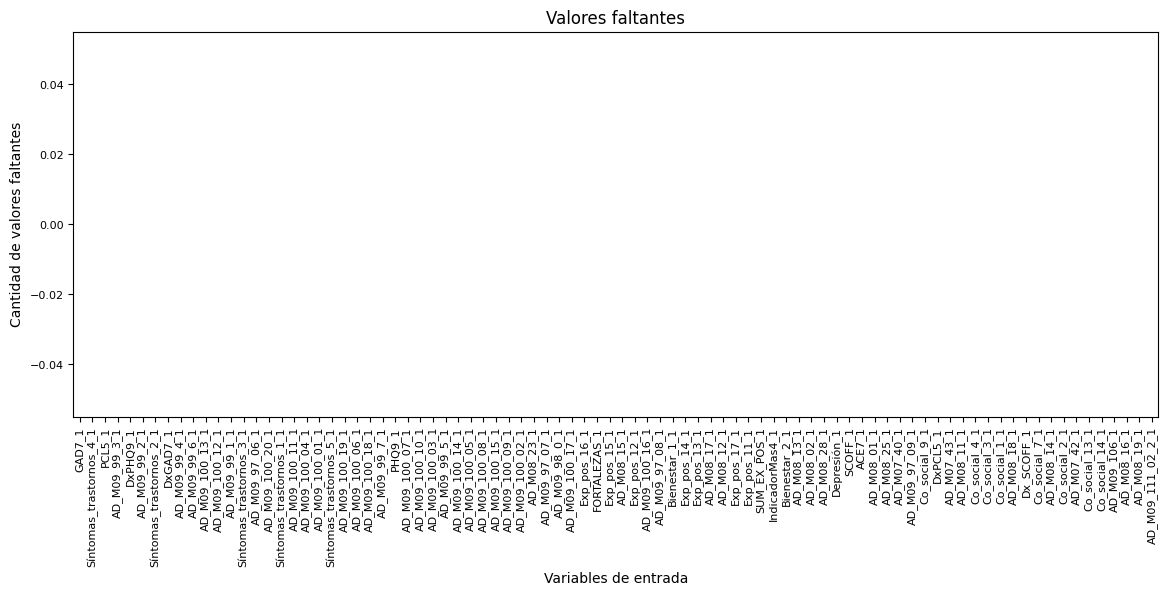

In [ ]:
# Calculamos la cantidad de valores faltantes por sexo
valores_faltantes_por_sexo = x_train.apply(lambda x: x.isnull().sum())

# Creamos una gráfica de barras con el conteo de los valores faltantes
valores_faltantes_por_sexo.plot(kind='bar', stacked=False,fontsize=8,rot=90,figsize=(14,5))
plt.title('Valores faltantes',fontsize=12)
plt.xlabel('Variables de entrada',fontsize=10)
plt.ylabel('Cantidad de valores faltantes',fontsize=10)
plt.show()

In [ ]:
# Revisamos los % de valores faltantes por columna
faltantes = (pd.isnull(x_train).sum()/x_train.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes

GAD7_1               0.0
SUM_EX_POS_1         0.0
ACE7_1               0.0
SCOFF_1              0.0
Depresión_1          0.0
                    ... 
AD_M09_100_10_1      0.0
AD_M09_100_07_1      0.0
PHQ9_1               0.0
AD_M09_99_7_1        0.0
AD_M09_111_02_2_1    0.0
Length: 86, dtype: float64

In [ ]:
# Generamos un resumen estadístico de las variables de entrada

x_train.describe()

,GAD7_1,Síntomas_trastornos_4_1,PCL5_1,AD_M09_99_3_1,DxPHQ9_1,AD_M09_99_2_1,Síntomas_trastornos_2_1,DxGAD7_1,AD_M09_99_4_1,AD_M09_99_6_1,...,Co_social_7_1,AD_M08_14_1,Co_social_2_1,AD_M07_42_1,Co_social_13_1,Co_social_14_1,AD_M09_106_1,AD_M08_16_1,AD_M08_19_1,AD_M09_111_02_2_1
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,...,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,0.626022,0.547003,0.600136,0.566757,0.660763,0.608311,0.602861,0.696866,0.653270,0.623297,...,0.596049,0.826294,0.582425,0.670300,0.544278,0.585150,0.745232,0.829700,0.839237,0.651907
std,0.484023,0.497955,0.490037,0.495692,0.473612,0.488294,0.489472,0.459769,0.476091,0.484725,...,0.490855,0.378985,0.493327,0.470264,0.498205,0.492864,0.435879,0.376024,0.367437,0.476528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
"""Visualizamos los tipos de caracteres. A pesar de ser tipo flotante o enteros,
por la naturaleza de la información la mayoría son datos de tipo categórico.
Solamente PROSOCIALIDAD y SUM_EXP_POS serán considerados como numéricos, ya que
son métricas acumuladas de las encuestas realizadas"""

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   GAD7_1                   1468 non-null   uint8
 1   Síntomas_trastornos_4_1  1468 non-null   int64
 2   PCL5_1                   1468 non-null   uint8
 3   AD_M09_99_3_1            1468 non-null   int64
 4   DxPHQ9_1                 1468 non-null   uint8
 5   AD_M09_99_2_1            1468 non-null   int64
 6   Síntomas_trastornos_2_1  1468 non-null   int64
 7   DxGAD7_1                 1468 non-null   uint8
 8   AD_M09_99_4_1            1468 non-null   int64
 9   AD_M09_99_6_1            1468 non-null   int64
 10  AD_M09_100_13_1          1468 non-null   int64
 11  AD_M09_100_12_1          1468 non-null   int64
 12  AD_M09_99_1_1            1468 non-null   int64
 13  Síntomas_trastornos_3_1  1468 non-null   int64
 14  AD_M09_97_06_1           1468 non-null   int64
 15  AD_M

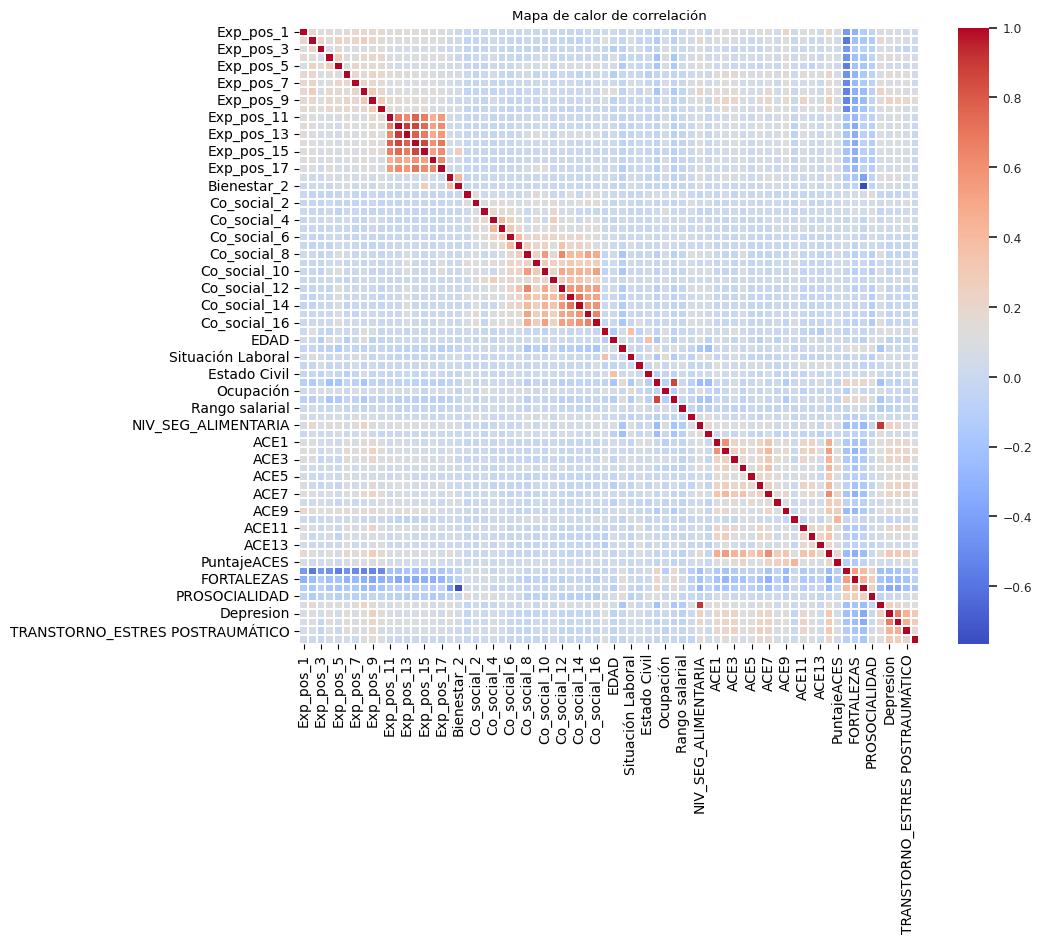

In [ ]:

# Calculamos la matriz de correlación
correlation_matrix = df_adultos_new.corr(method='pearson')

# Creamos un mapa de calor de la matriz de correlación

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=0.8)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.05)
plt.title('Mapa de calor de correlación')
plt.show()


De la matriz de correlación vemos que las experiencias positivas tienen cierta correlación negativa con las experiencias adversas, sin embargo uno de los objetivos de nuestro proyecto es ponderar cuáles de las experiencias positivas tienen un mayor efecto de mitigación de las patologías etiquetadas. Así mismo, pudimos notar que entre mayor inseguridad alimentaria se tiene (NIV_SEG_ALIMENTARIA), hay una clara correlación con el trastorno de depresión. Por otro lado, inicialmente asumíamos que una mayor cohesión social (Co_social) tendría cierto beneficio para redicir las enfermedades psicológicas, pero no se puede identificar ninguna correlación claramente.

A continuación utilizamos Pandas Profiling como una herramienta automática para realizar el análisis EDA, sin embargo seleccionaremos un sub-conjunto de datos, ya que los recursos de cómputo con los que contamos en Google Colab son limitados.

In [ ]:
#!pip install ydata_profiling --upgrade

In [ ]:
#pip install pandas-profiling

In [ ]:
#!pip install typing_extensions

In [ ]:
# probamos con un subset de datos más pequeño para correrlo en Pandas Profiling
df_adultos_new.drop(columns=['INDIGENA', 'Situación Laboral', 'Religiosidad', 'Estado Civil',
       'Estudios padres', 'Ocupación', 'ESCOLARIDAD', 'Rango salarial',
       'Servicio de salud','ACE1', 'ACE2', 'ACE3', 'ACE4', 'ACE5',
       'ACE6', 'ACE7', 'ACE8', 'ACE9', 'ACE10', 'ACE11', 'ACE12', 'ACE13',
       'ACE_mas_4', 'PuntajeACES','Co_social_1', 'Co_social_2', 'Co_social_3', 'Co_social_4',
       'Co_social_5', 'Co_social_6', 'Co_social_7', 'Co_social_8',
       'Co_social_9', 'Co_social_10', 'Co_social_11', 'Co_social_12',
       'Co_social_13', 'Co_social_14', 'Co_social_15', 'Co_social_16'],inplace=True)

In [ ]:
df_adultos_new.columns

Index(['Exp_pos_1', 'Exp_pos_2', 'Exp_pos_3', 'Exp_pos_4', 'Exp_pos_5',
       'Exp_pos_6', 'Exp_pos_7', 'Exp_pos_8', 'Exp_pos_9', 'Exp_pos_10',
       'Exp_pos_11', 'Exp_pos_12', 'Exp_pos_13', 'Exp_pos_14', 'Exp_pos_15',
       'Exp_pos_16', 'Exp_pos_17', 'Bienestar_1', 'Bienestar_2', 'SEXO',
       'EDAD', 'NIV_SEG_ALIMENTARIA', 'AREA', 'EX_BENEVOLENTES', 'FORTALEZAS',
       'FELICIDAD', 'PROSOCIALIDAD', 'SUM_EX_POS', 'Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA'],
      dtype='object')

In [ ]:
from ydata_profiling import ProfileReport
#from pandas_profiling import ProfileReport


report = ProfileReport(df_adultos2)

report.to_notebook_iframe()



ModuleNotFoundError: No module named 'ydata_profiling'

Del análisis automático realizado por Pandas Profiling, vemos que las variables de salida están claramente desbalanceadas, teniendo una mayor concentración de datos en los grados moderados de las enfermedades en todos los casos. Podemos ver que las severidades ascienden en magnitud en las categorías etiquetadas (1 a 5), por lo que será necesario convertir dichas categorías en variables separadas para facilitar su procesamiento al asignar la clase a predecir, de manera que tendremos múltiples variables de salida.

En el análisis bivariable que realiza vemos que la Prosocialidad aumenta a partir de los 30 años de edad y es prácticamente nula en edades más tempranas. También vemos que las experiencias positivas se dan desde los 8 ó 10 años de edad,contribuyendo a una mayor percepción de felicidad por los encuestados.

In [ ]:
# Análisis multivariable: creamos gráficas Pair Plot para un sub-conjunto
# de variables de entrada y salida:

VARS = ['Bienestar_1', 'Bienestar_2','NIV_SEG_ALIMENTARIA',
        'Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']

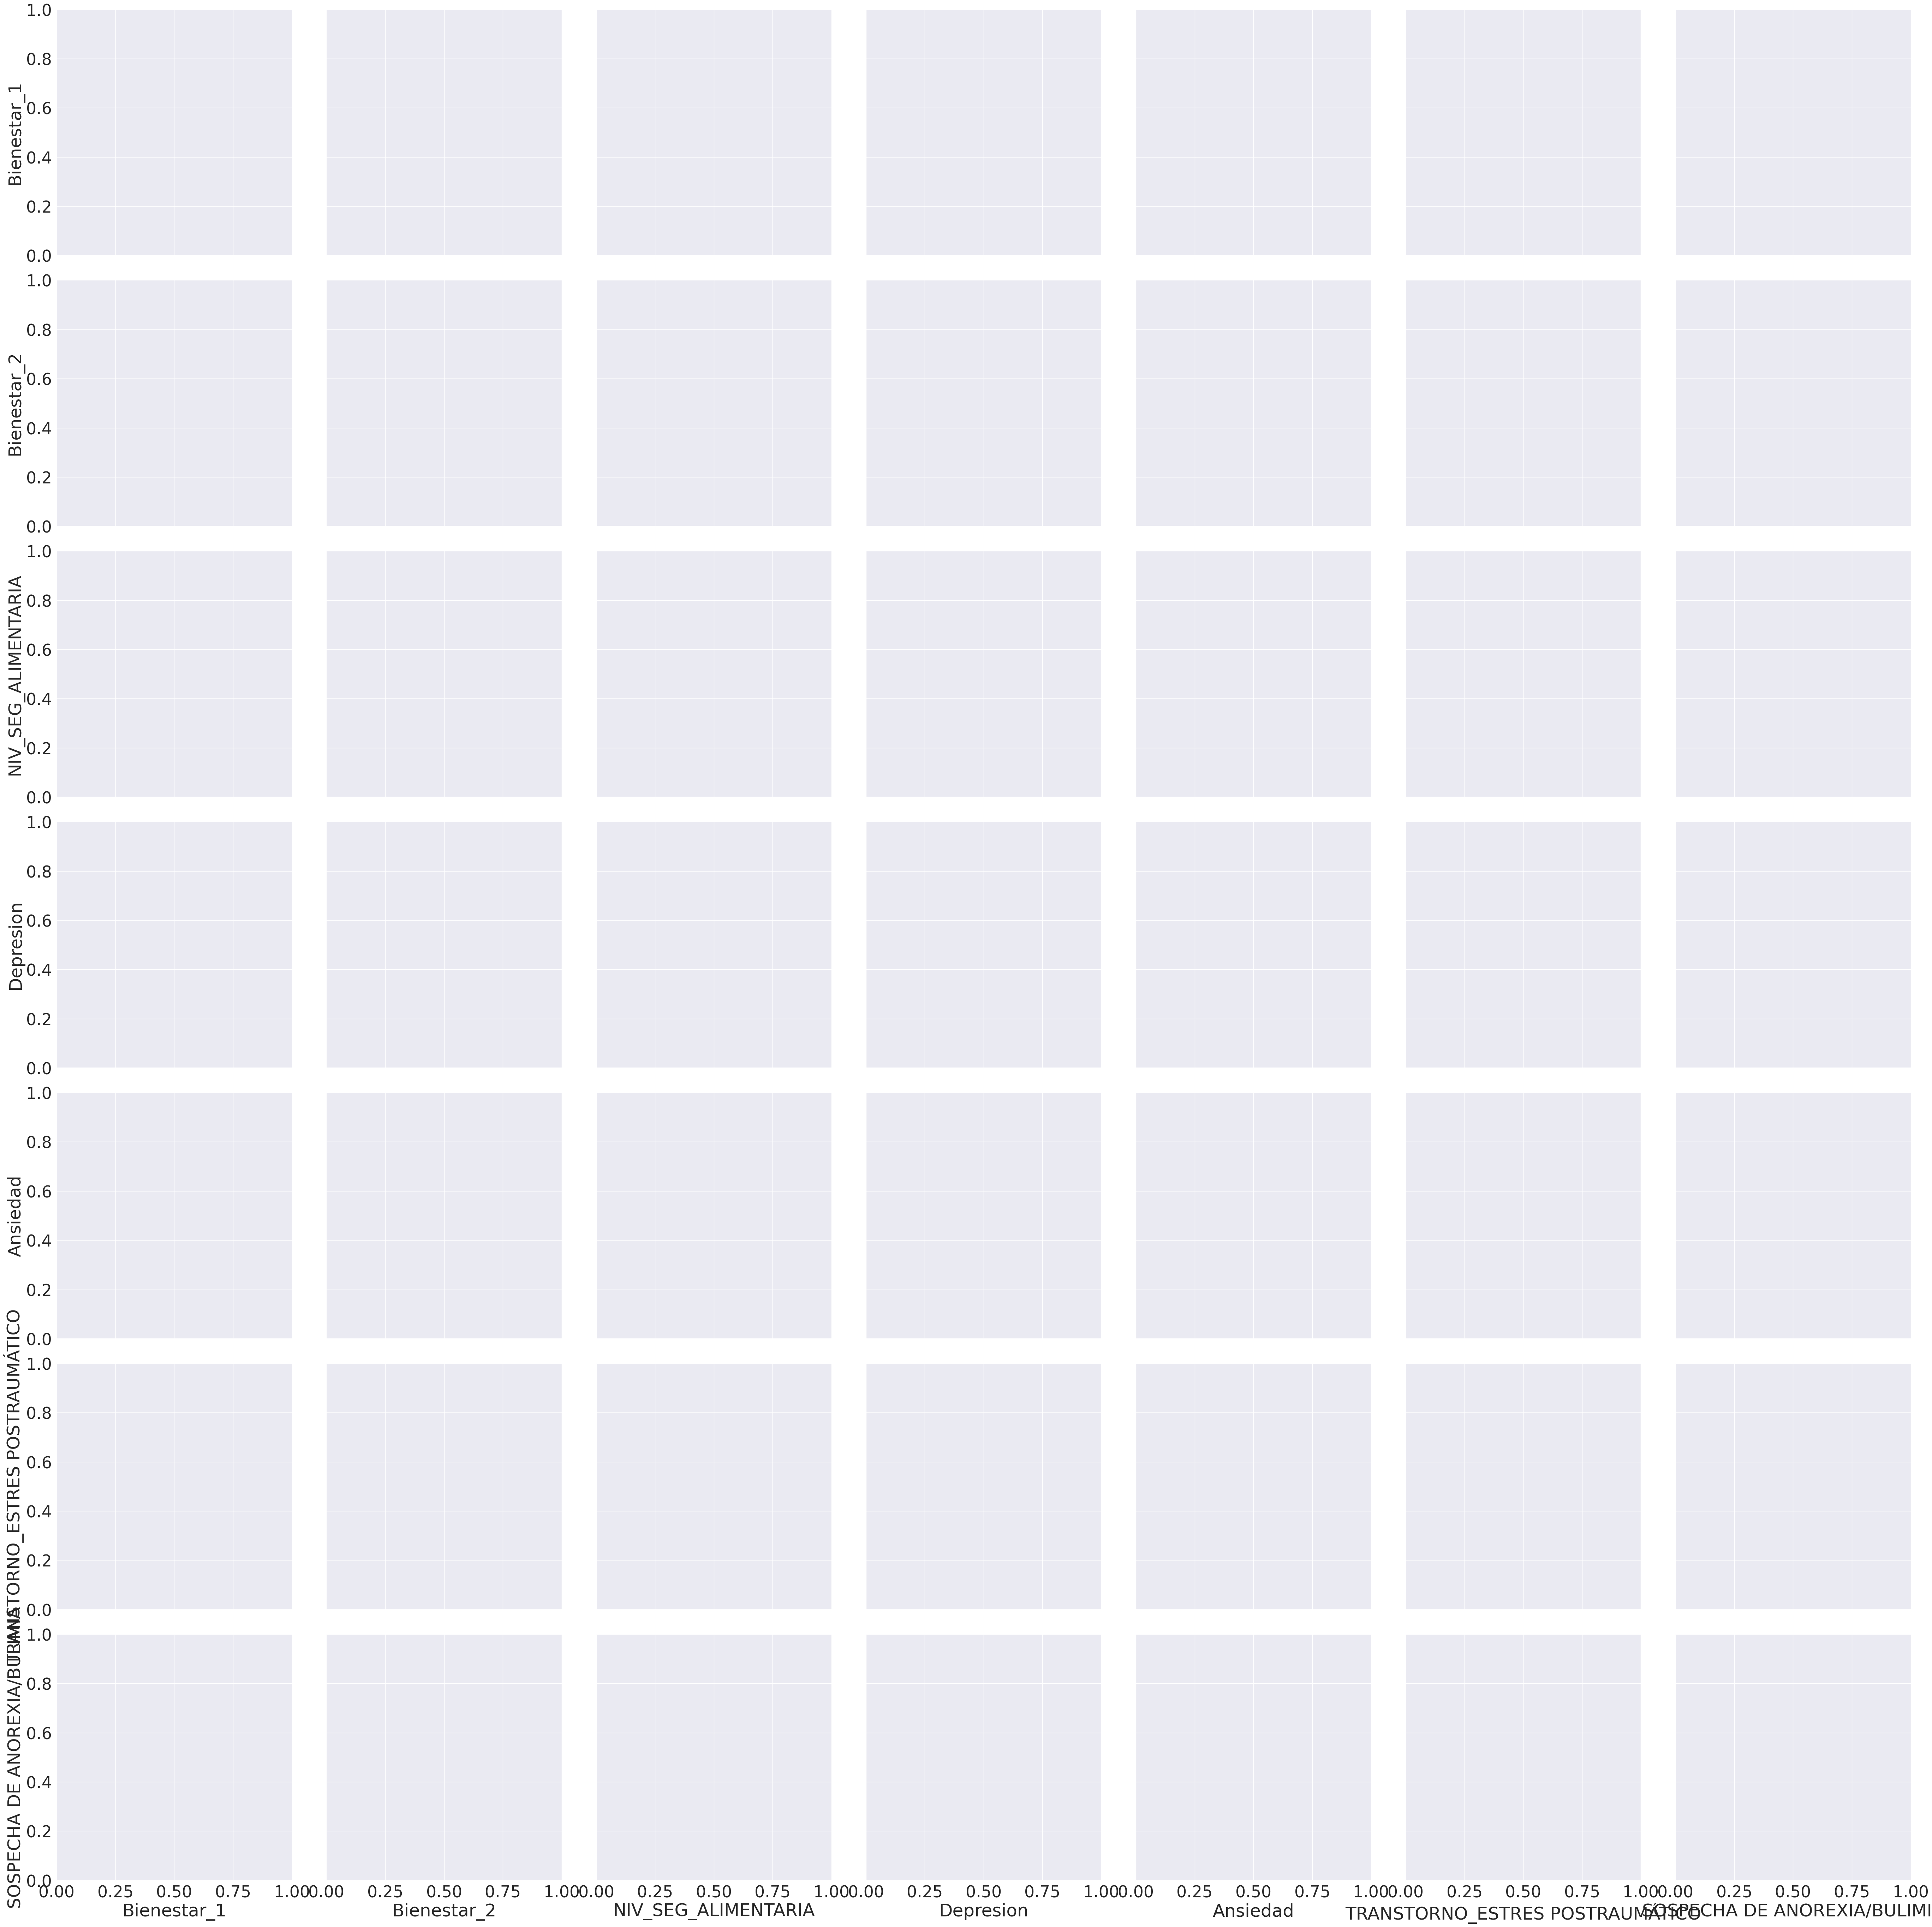

In [ ]:
# Gráfica pair plot, vemos en la diagonal los histogramas que reflejan las
# diferentes categorías por variable.

sns.set(font_scale=3)

sns.pairplot(df_adultos2,vars = VARS, kind="reg",height=8)
#fig, ax = plt.subplots(figsize=(20, 20))
plt.show()

In [ ]:
# Identificamos las columnas numéricas y categóricas
numeric_columns = x_train.select_dtypes(include=np.number).columns
numeric_columns


Index(['GAD7_1', 'Síntomas_trastornos_4_1', 'PCL5_1', 'AD_M09_99_3_1',
       'DxPHQ9_1', 'AD_M09_99_2_1', 'Síntomas_trastornos_2_1', 'DxGAD7_1',
       'AD_M09_99_4_1', 'AD_M09_99_6_1', 'AD_M09_100_13_1', 'AD_M09_100_12_1',
       'AD_M09_99_1_1', 'Síntomas_trastornos_3_1', 'AD_M09_97_06_1',
       'AD_M09_100_20_1', 'Síntomas_trastornos_1_1', 'AD_M09_100_11_1',
       'AD_M09_100_04_1', 'AD_M09_100_01_1', 'Síntomas_trastornos_5_1',
       'AD_M09_100_19_1', 'AD_M09_100_06_1', 'AD_M09_100_18_1',
       'AD_M09_99_7_1', 'PHQ9_1', 'AD_M09_100_07_1', 'AD_M09_100_10_1',
       'AD_M09_100_03_1', 'AD_M09_99_5_1', 'AD_M09_100_14_1',
       'AD_M09_100_05_1', 'AD_M09_100_08_1', 'AD_M09_100_15_1',
       'AD_M09_100_09_1', 'AD_M09_100_02_1', 'AD_M08_23_1', 'AD_M09_97_07_1',
       'AD_M09_98_0_1', 'AD_M09_100_17_1', 'Exp_pos_16_1', 'FORTALEZAS_1',
       'Exp_pos_15_1', 'AD_M08_15_1', 'Exp_pos_12_1', 'AD_M09_100_16_1',
       'AD_M09_97_08_1', 'Bienestar_1_1', 'Exp_pos_14_1', 'Exp_pos_13_1',


In [ ]:
numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns

numeric_columns

Index(['Síntomas_trastornos_4_1', 'AD_M09_99_3_1', 'AD_M09_99_2_1',
       'Síntomas_trastornos_2_1', 'AD_M09_99_4_1', 'AD_M09_99_6_1',
       'AD_M09_100_13_1', 'AD_M09_100_12_1', 'AD_M09_99_1_1',
       'Síntomas_trastornos_3_1', 'AD_M09_97_06_1', 'AD_M09_100_20_1',
       'Síntomas_trastornos_1_1', 'AD_M09_100_11_1', 'AD_M09_100_04_1',
       'AD_M09_100_01_1', 'Síntomas_trastornos_5_1', 'AD_M09_100_19_1',
       'AD_M09_100_06_1', 'AD_M09_100_18_1', 'AD_M09_99_7_1',
       'AD_M09_100_07_1', 'AD_M09_100_10_1', 'AD_M09_100_03_1',
       'AD_M09_99_5_1', 'AD_M09_100_14_1', 'AD_M09_100_05_1',
       'AD_M09_100_08_1', 'AD_M09_100_15_1', 'AD_M09_100_09_1',
       'AD_M09_100_02_1', 'AD_M08_23_1', 'AD_M09_97_07_1', 'AD_M09_98_0_1',
       'AD_M09_100_17_1', 'Exp_pos_16_1', 'Exp_pos_15_1', 'AD_M08_15_1',
       'Exp_pos_12_1', 'AD_M09_100_16_1', 'AD_M09_97_08_1', 'Bienestar_1_1',
       'Exp_pos_14_1', 'Exp_pos_13_1', 'AD_M08_17_1', 'AD_M08_12_1',
       'Exp_pos_17_1', 'Exp_pos_11_1', '

In [ ]:
# Seleccionamos las columnas categóricas

df_categorical_columns = x_train.select_dtypes(exclude=['int64', 'float64']).columns

df_categorical_columns


Index(['GAD7_1', 'PCL5_1', 'DxPHQ9_1', 'DxGAD7_1', 'PHQ9_1', 'FORTALEZAS_1',
       'SUM_EX_POS_1', 'IndicadorMas4_1', 'SCOFF_1', 'ACE7_1', 'DxPCL5_1',
       'Dx_SCOFF_1'],
      dtype='object')

In [ ]:
''' Aplicamos las transformaciones sobre variables numéricas con sesgo
en su histograma.'''

import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Lista de variables a transformar
variables_a_transformar = numeric_columns

# Crear subgráficos para todas las variables
fig, axs = plt.subplots(len(variables_a_transformar), 2, figsize=(8, len(variables_a_transformar) * 2))

# Iterar sobre la lista de variables
for i, variable in enumerate(variables_a_transformar):

    # Obtener la serie de la variable original
    original_data = x_train[variable]

    # Aplicar la transformación de Box-Cox
    transformed_data, lambda_value = boxcox(original_data + 1)  # Se suma 1 para manejar valores no positivos

    # Crear histograma para la distribución original
    axs[i, 0].hist(original_data, bins=20, color='b', alpha=0.7)
    axs[i, 0].set_title(f'Distribución original de {variable}', fontsize=8)

    # Crear histograma para la distribución transformada
    axs[i, 1].hist(transformed_data, bins=20, color='r', alpha=0.7)
    axs[i, 1].set_title(f'Distribución transformada de {variable} (Box-Cox)', fontsize=8)

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()


In [ ]:
# Visualizamos los datos de entrada atípicos con una gráfica tipo Box-Plot

x_train.plot(kind='box',fontsize=8,rot=90,figsize=(14,5))
plt.title('box plot ', fontsize=12)
plt.ylabel('Respuestas', fontsize=10)
plt.show()

In [ ]:
# Removemos outliers
# Iteramos a través de cada columna
for col in x_train.columns:
    if pd.api.types.is_numeric_dtype(x_train[col]):  # Verificar si la columna es de tipo numérico
        Q1 = x_train[col].quantile(0.25)
        Q3 = x_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        x_train = x_train[(x_train[col] >= lower_bound) & (x_train[col] <= upper_bound)]

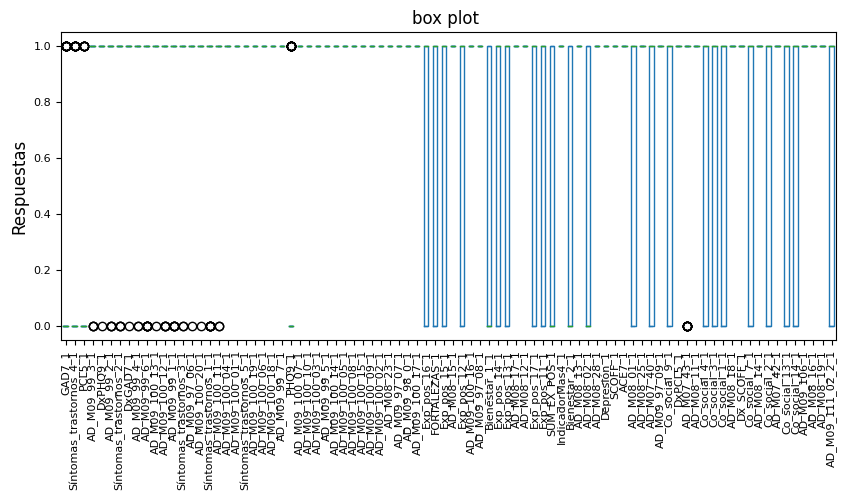

In [ ]:
# Verificamos con gráfica box plot nuevamente:

x_train.plot(kind='box',fontsize=8,rot=90,figsize=(10,4))
plt.title('box plot ',fontsize=12)
plt.ylabel('Respuestas',fontsize=12)
plt.show()

En general, consideramos que la información después del pre-procesamiento es de una calidad aceptable para utilizarla en modelos de aprendizaje automático, considerando que algunas columnas reflejan la valoración que hicieron los expertos en la materia sobre el diagnóstico objetivo de las patologías etiquetadas después de analizar las respuestas proporcionadas por los encuestados.

Finalmente, debido a que se trata de datos categóricos en su mayoría, no consideramos que se tengan que normalizar, ya que necesitamos que cada categoría se conserve con su magnitud original para entender la importancia de cada variable en el resultado final.


#Base de datos de niños

In [457]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [458]:
import pandas as pd

# Cargamos el archivo Excel
file_path = '/content/drive/MyDrive/2.2.Base de ACES_Menores.xlsx'
df = pd.read_excel(file_path)

# Verificamos las primeras filas del dataframe para entender su estructura
df.head()

,FOLIO,FOLIO2,VERSION,FILTRO,ENT,ENTIDAD,MUN,MUNICIPIO,LOC,LOCALIDAD,...,GPOEDAD,ESCOLARIDAD,HERMANOS,ACT_FAM,NLIBROS,NOVIOLENCIA,VIOLENCIA_FIS,VIOLENCIA_PSIC,VIOLENCIA,VIOLENCIA_SEVERA
0,0100108639999001-01,0100108639999001-01,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,1.0,2.0,1.0,2,0,0.0,0.0,0.0,1.0,0.0
1,0100108639999001-03,0100108639999001-03,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,NaN,1.0,1.0,1,0,0.0,0.0,1.0,1.0,0.0
2,0100108639999001-04,0100108639999001-04,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,NaN,1.0,1.0,2,0,1.0,0.0,0.0,0.0,0.0
3,0100108639999001-05,0100108639999001-05,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,2.0,1.0,1.0,2,0,0.0,0.0,0.0,1.0,0.0
4,0100108639999002-02,0100108639999002-02,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,2.0,1.0,1.0,1,0,0.0,1.0,0.0,1.0,0.0


In [459]:
# Columns to be removed
columns_to_remove = [
    "NN_M06_09", "NN_M06_10_1", "NN_M06_10_2", "NN_M06_10_3", "NN_M06_10_4",
    "NN_M06_10_5", "NN_M06_10_6", "NN_M06_10_7", "NN_M06_10_8", "NN_M05_18",
    "NN_M05_19", "NN_M06_02", "NN_M06_03", "NN_M06_04", "NN_M06_07",
    "NN_M06_10_9", "NN_M06_10_10", "NN_M06_10_11", "NN_M06_10_12",
    "NN_M06_10_13", "NN_M06_10_14", "NN_M06_10_15", "NN_M06_10_16",
    "NN_M07_05", "NN_M07_06", "NN_M07_18B", "NN_M07_19A2", "NN_M07_19B2",
    "NN_M07_19C2", "NN_M07_19D2", "NN_M07_19E2", "NN_M07_19F2", "NN_M07_19G2",
    "NN_M07_22", "NN_MO7_25V", "NN_M07_26", "NN_M14_02", "NN_M14_04",
    "NN_M14_06", "NN_M14_08", "NN_M03_02", "NN_M03_03", "NN_M03_04",
    "NN_M03_05", "NN_M03_06", "FOLIO2","FOLIO","MESES_CALC","DIAS_CALC", "VERSION", "FILTRO", "ENT", "ENTIDAD",
    "MUN", "MUNICIPIO", "LOC", "LOCALIDAD", "AGEB", "MZN", "ENC", "MAQUINA",
    "GPS1", "LATITUD", "LONGITUD","PEARLS_Pte1","NM_M04_01","NN_M04_04","NN_M04_06","NN_M04_07", "GPOEDAD","NN_M04_05","NN_M05_02", "NM_M04_03",
    "NN_M05_10", "NN_M07_01", "NN_M07_02", "NN_M07_03", "NN_M07_17", "NN_M07_18",
    "NN_M12_01", "NN_M12_261", "NN_M13_09", "EDADM", "HERMANOS","PONDERADOR"
]

# Remove the specified columns
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')

df_cleaned.head()

,EDAD_CALC,NN_M04_08,NN_M04_09,NN_M04_10,NN_M04_11,NN_M04_12,NN_M04_13,NOTA5,NN_M05_01,NN_M05_03,...,RURAL,AREA,ESCOLARIDAD,ACT_FAM,NLIBROS,NOVIOLENCIA,VIOLENCIA_FIS,VIOLENCIA_PSIC,VIOLENCIA,VIOLENCIA_SEVERA
0,3,NaN,4,NaN,1,2.0,2,1,23,1,...,1,1,2.0,2,0,0.0,0.0,0.0,1.0,0.0
1,5,NaN,3,NaN,1,1.0,2,1,25,1,...,1,1,1.0,1,0,0.0,0.0,1.0,1.0,0.0
2,5,NaN,3,NaN,1,1.0,2,1,21,1,...,1,1,1.0,2,0,1.0,0.0,0.0,0.0,0.0
3,4,NaN,2,NaN,1,3.0,3,1,28,1,...,1,1,1.0,2,0,0.0,0.0,0.0,1.0,0.0
4,4,NaN,2,NaN,1,1.0,1,1,14,1,...,1,1,1.0,1,0,0.0,1.0,0.0,1.0,0.0


In [460]:
# Buscamos y eliminamos columnas que coincidan con el patrón "NOTA(numero)"
import re

# Patrón para identificar las columnas con el formato "NOTA(numero)"
pattern = re.compile(r'NOTA\d+')

# Filtramos las columnas que coinciden con el patrón
columns_to_remove = [col for col in df_cleaned.columns if pattern.match(col)]

# Eliminamos las columnas identificadas del dataframe
df_cleaned_filtered = df_cleaned.drop(columns=columns_to_remove, errors='ignore')

# Mostramos las columnas eliminadas y la nueva dimensión del dataframe
columns_to_remove, df_cleaned_filtered.shape

(['NOTA5',
  'NOTA6',
  'NOTA7',
  'NOTA8',
  'NOTA9',
  'NOTA10',
  'NOTA11A',
  'NOTA11B',
  'NOTA11C',
  'NOTA11D',
  'NOTA12',
  'NOTA121',
  'NOTA13',
  'NOTA14'],
 (249, 299))

In [461]:
# Removemos filas duplicadas
df_no_duplicates = df_cleaned_filtered.drop_duplicates()

# Calculamos el porcentaje de datos faltantes por columna
missing_data_percent = df_no_duplicates.isnull().mean() * 100

# Filtramos las columnas para remover aquellas con más del 50% de datos faltantes
columns_to_keep = missing_data_percent[missing_data_percent <= 50].index

# Mantenemos solo las columnas seleccionadas
df_filtered_final = df_no_duplicates[columns_to_keep]

# Resultados
df_no_duplicates_shape = df_no_duplicates.shape
df_filtered_final_shape = df_filtered_final.shape
df_no_duplicates_shape, df_filtered_final_shape

((249, 299), (249, 219))

In [462]:
# Definimos una función que sustituye los valores de cada columna con 1 cuando el valor boolean
# de la comparación de cada elemento con la moda de la columna es True y 0 cuando es False

def categorize_by_mode(column, all_modes=False, default_value=0):
    mode_values = column.mode()
    if not mode_values.empty:
        if all_modes:
            return column.isin(mode_values).astype(int)
        else:
            mode_value = mode_values.iloc[0]
            return column.eq(mode_value).astype(int)
    else:
        return pd.Series(default_value, index=column.index)

In [463]:
# Definimos una función para utilizar una frecuencia mínima de ocurrencia
# para reducir el número de categorías para las variables con alta cardinalidad

from collections import Counter

def cumulatively_categorise(column):

  #Replace all instances not in our new categories by 0
  new_column=column.eq(column.mode()).astype(int)

  #Return transformed column and unique values if return_categories=True
  return new_column

In [464]:
for col in df_filtered_final.columns:
    mode_value = df_filtered_final[col].mode()[0]  # Tomamos la primera moda si hay múltiples
    df_filtered_final[col].fillna(mode_value, inplace=True)

<ipython-input-464-fc54dea672a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col].fillna(mode_value, inplace=True)
<ipython-input-464-fc54dea672a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col].fillna(mode_value, inplace=True)
<ipython-input-464-fc54dea672a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col].fillna(mode_value, inplace=True)
<ipython-input-464-fc54de

In [465]:
df_filtered_final.head(10)

,EDAD_CALC,NN_M04_09,NN_M04_11,NN_M04_12,NN_M04_13,NN_M05_01,NN_M05_03,NN_M05_04,NN_M05_06,NN_M05_08,...,RURAL,AREA,ESCOLARIDAD,ACT_FAM,NLIBROS,NOVIOLENCIA,VIOLENCIA_FIS,VIOLENCIA_PSIC,VIOLENCIA,VIOLENCIA_SEVERA
0,3,4,1,2.0,2,23,1,1,2,2,...,1,1,2.0,2,0,0.0,0.0,0.0,1.0,0.0
1,5,3,1,1.0,2,25,1,2,1,2,...,1,1,1.0,1,0,0.0,0.0,1.0,1.0,0.0
2,5,3,1,1.0,2,21,1,2,1,2,...,1,1,1.0,2,0,1.0,0.0,0.0,0.0,0.0
3,4,2,1,3.0,3,28,1,2,1,2,...,1,1,1.0,2,0,0.0,0.0,0.0,1.0,0.0
4,4,2,1,1.0,1,14,1,2,1,2,...,1,1,1.0,1,0,0.0,1.0,0.0,1.0,0.0
5,3,4,2,1.0,1,26,1,2,1,2,...,1,1,2.0,2,0,1.0,0.0,0.0,0.0,0.0
6,5,3,1,1.0,1,17,1,2,1,2,...,1,1,1.0,1,0,0.0,0.0,1.0,1.0,0.0
7,5,3,1,6.0,4,31,1,2,1,2,...,1,1,1.0,2,0,0.0,0.0,1.0,1.0,0.0
8,3,4,1,2.0,2,29,1,2,1,2,...,1,1,2.0,2,0,0.0,0.0,0.0,0.0,0.0
9,4,2,1,2.0,1,18,1,2,1,2,...,1,1,1.0,2,0,0.0,0.0,0.0,1.0,0.0


In [466]:
# Cargamos el diccionario de la encuesta para identificar las columnas de clasificación
diccionario_path = '/content/Diccionario Encuestas Niños.xlsx'
diccionario_df = pd.read_excel(diccionario_path)

# Verificamos las primeras filas del diccionario para entender su estructura
diccionario_df.head()

,ID Columna,Categoria,Descripcion,Valores
0,NM_M04_03,Individuo,FECHA DE NACIMIENTO DE,NaN
1,NM_M04_04,Individuo,¿FUE VERIFICADA LA FECHA DE NACIMIENTO?,NaN
2,EDAD_CALC,Individuo,EDAD_CALC,NaN
3,MESES_CALC,Individuo,MESES_CALC,NaN
4,DIAS_CALC,Individuo,DIAS_CALC,NaN


In [467]:
# Filtramos las columnas que tienen valores definidos, indicando posiblemente una clasificación
columnas_con_valores_definidos = diccionario_df[diccionario_df['Valores'].notnull()]['ID Columna']

# Convertimos la serie en lista para facilitar la visualización
columnas_con_valores_definidos_list = columnas_con_valores_definidos.tolist()

columnas_con_valores_definidos_list

['NN_M04_11',
 'NOTA5',
 'NN_M05_03',
 'NN_M05_04',
 'NN_M05_06',
 'NN_M05_08',
 'NN_M05_09',
 'NN_M05_10',
 'NN_M05_11',
 'NN_M05_12',
 'NN_M05_13',
 'NN_M05_14',
 'NN_M05_15',
 'NN_M05_17',
 'NN_M06_01',
 'NN_M06_05',
 'NN_M06_07',
 'NN_M06_09',
 'NN_M06_10_1',
 'NN_M06_10_2',
 'NN_M06_10_3',
 'NN_M06_10_4',
 'NN_M06_10_5',
 'NN_M06_10_6',
 'NN_M06_10_7',
 'NN_M06_10_8',
 'NN_M05_17',
 'NN_M06_01',
 'NN_M06_05',
 'NN_M06_07',
 'NN_M06_10_9',
 'NN_M06_10_10',
 'NN_M06_10_11',
 'NN_M06_10_12',
 'NN_M06_10_13',
 'NN_M06_10_14',
 'NN_M06_10_15',
 'NN_M06_10_16',
 'NN_M07_01',
 'NN_M07_02',
 'NN_M07_03',
 'NN_M07_04',
 'NN_M07_07',
 'NN_M07_08',
 'NN_M07_11',
 'NN_M07_12',
 'NN_M07_13',
 'NN_M07_14',
 'NN_M07_15',
 'NN_M07_16',
 'NN_M07_17',
 'NN_M07_18',
 'NN_M07_18B',
 'NN_M07_19A1',
 'NN_M07_19A2',
 'NN_M07_19B1',
 'NN_M07_19B2',
 'NN_M07_19C1',
 'NN_M07_19C2',
 'NN_M07_19D1',
 'NN_M07_19D2',
 'NN_M07_19E1',
 'NN_M07_19E2',
 'NN_M07_19F1',
 'NN_M07_19F2',
 'NN_M07_19G1',
 'NN_M07_19G2'

In [468]:
# Convertimos las columnas identificadas como categóricas en el dataframe a tipo 'category'
for col in columnas_con_valores_definidos_list:
    if col in df_filtered_final.columns:
        df_filtered_final[col] = df_filtered_final[col].astype('category')

# Verificamos los nuevos tipos de datos para confirmar la conversión
df_filtered_final.dtypes

<ipython-input-468-ec22d330c6ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col] = df_filtered_final[col].astype('category')
<ipython-input-468-ec22d330c6ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col] = df_filtered_final[col].astype('category')
<ipython-input-468-ec22d330c6ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

EDAD_CALC              int64
NN_M04_09              int64
NN_M04_11           category
NN_M04_12            float64
NN_M04_13              int64
                      ...   
NOVIOLENCIA         category
VIOLENCIA_FIS        float64
VIOLENCIA_PSIC       float64
VIOLENCIA            float64
VIOLENCIA_SEVERA     float64
Length: 219, dtype: object

In [469]:
columnas_numericas = df_filtered_final.select_dtypes(include=['number']).columns.tolist()

columnas_numericas

['EDAD_CALC',
 'NN_M04_09',
 'NN_M04_12',
 'NN_M04_13',
 'NN_M05_01',
 'NN_M06_06',
 'NN_M07_09',
 'NN_M07_10',
 'NN_M10_01A',
 'NN_M10_03',
 'PEARLS1',
 'Escala1',
 'Escala2',
 'Escala3',
 'Escala4',
 'Escala5',
 'Escala_Inter',
 'Escala_Exter',
 'Escala_Total',
 'SDQ3',
 'DxSDQ3',
 'SDQ4',
 'DxSDQ4',
 'PEARLS_Pte2',
 'ABUSO_SEXUAL',
 'NSEF',
 'NSE5F',
 'RURAL',
 'NLIBROS',
 'VIOLENCIA_FIS',
 'VIOLENCIA_PSIC',
 'VIOLENCIA',
 'VIOLENCIA_SEVERA']

In [470]:
columnas_a_convertir = [
    "PEARLS1", "Escala1", "Escala2", "Escala3", "Escala4", "Escala5",
    "Escala_Inter", "Escala_Exter", "Escala_Total", "SDQ3", "DxSDQ3", "SDQ4",
    "DxSDQ4", "PEARLS_Pte2", "ABUSO_SEXUAL", "NSEF", "NSE5F", "RURAL",
    "VIOLENCIA_FIS", "VIOLENCIA_PSIC", "VIOLENCIA", "VIOLENCIA_SEVERA"
]

# Convertimos las columnas especificadas a tipo 'category'
for col in columnas_a_convertir:
    if col in df_filtered_final.columns:
        df_filtered_final[col] = df_filtered_final[col].astype('category')

# Verificamos los tipos de las columnas convertidas para confirmar la conversión
df_filtered_final[columnas_a_convertir].dtypes

<ipython-input-470-930257372d6c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col] = df_filtered_final[col].astype('category')
<ipython-input-470-930257372d6c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col] = df_filtered_final[col].astype('category')
<ipython-input-470-930257372d6c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

PEARLS1             category
Escala1             category
Escala2             category
Escala3             category
Escala4             category
Escala5             category
Escala_Inter        category
Escala_Exter        category
Escala_Total        category
SDQ3                category
DxSDQ3              category
SDQ4                category
DxSDQ4              category
PEARLS_Pte2         category
ABUSO_SEXUAL        category
NSEF                category
NSE5F               category
RURAL               category
VIOLENCIA_FIS       category
VIOLENCIA_PSIC      category
VIOLENCIA           category
VIOLENCIA_SEVERA    category
dtype: object

In [471]:
# Primero, creamos un diccionario de mapeo de ID de columna a Descripción omitiendo la columna PEARLS1
mapeo_titulos = diccionario_df.set_index('ID Columna')['Descripcion'].to_dict()

# Modificamos el nombre de 'PEARLS1' a 'PEARLS' en el diccionario de mapeo si está presente
if 'PEARLS1' in mapeo_titulos:
    mapeo_titulos['PEARLS'] = mapeo_titulos.pop('PEARLS1')

# Renombramos las columnas del dataframe usando el diccionario de mapeo
# Solo se renombrarán las columnas presentes tanto en el dataframe como en el diccionario de mapeo
columnas_renombradas_df = df_filtered_final.rename(columns=lambda x: mapeo_titulos[x] if x in mapeo_titulos else x)

# Mostramos algunas de las nuevas columnas para confirmar el cambio
columnas_renombradas_df.columns.tolist()[:10]  # Mostramos solo las primeras 10 para verificar

['EDAD_CALC',
 'NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO',
 '¿TIENE HERMANOS?',
 '¿CUÁNTOS HERMANOS TIENE NOMBRE?',
 'DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?',
 'EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE',
 'LA MADRE LLEVÓ CONTROL PRENATAL',
 'HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO',
 'DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL  TABACO O ALGUNA SUSTANCIA',
 'DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA  PSICOLÓGICA  ECONÓMICA O SEXUAL?']

In [472]:
estadisticas_descriptivas = columnas_renombradas_df.select_dtypes(include=['number']).describe()

estadisticas_descriptivas

,EDAD_CALC,NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO,¿CUÁNTOS HERMANOS TIENE NOMBRE?,DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?,EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE,¿CUÁNTAS COMIDAS NOMBRE HACE AL DÍA?,¿CUANTAS VECES AL AÑO SE ENFERMA NOMBRE DE LAS VÍAS RESPIRATORIAS?,¿CUANTAS VECES AL AÑO A NOMBRE LE DA DIARREA?,NN_M10_01A,74. ¿CUÁNTOS DÍAS A LA SEMANA DEJÓ A SU HIJO/A AL CUIDADO DE OTRO NIÑO/A ES DECIR CON ALGUIEN MENOR DE 10 AÑOS,8.2. NÚMERO DE LIBROS
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,3.991968,2.686747,1.658635,2.068273,25.791165,3.240964,4.489960,2.714859,1.550201,0.236948,2.248996
std,0.941824,1.084283,1.047239,1.121346,8.062543,0.860284,9.119773,7.640289,1.983422,0.863741,4.183571
min,0.000000,1.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,21.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1.000000,2.000000,25.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,5.000000,3.000000,2.000000,3.000000,30.000000,4.000000,4.000000,2.000000,3.000000,0.000000,0.000000
max,7.000000,5.000000,6.000000,8.000000,99.000000,7.000000,99.000000,99.000000,8.000000,7.000000,10.000000


In [473]:
# Definir las funciones de agrupación para cada variable

# Edad en años cumplidos
def agrupar_edad(edad):
    if edad <= 4:
        return '0-4'
    elif edad <= 9:
        return '5-9'
    else:
        return '10-14'

# Número de hermanos
def agrupar_hermanos(num_hermanos):
    if pd.isna(num_hermanos):
        return 'Desconocido'
    elif num_hermanos == 0:
        return '0'
    elif num_hermanos <= 2:
        return '1-2'
    elif num_hermanos <= 4:
        return '3-4'
    else:
        return '5+'

# Edad de la madre al embarazarse
def agrupar_edad_madre(edad):
    if edad < 20:
        return '<20'
    elif edad <= 29:
        return '20-29'
    elif edad <= 39:
        return '30-39'
    else:
        return '40+'

# Convertir a numérico, errores a NaN
columnas_renombradas_df['EDAD_CALC'] = pd.to_numeric(columnas_renombradas_df['EDAD_CALC'], errors='coerce')
columnas_renombradas_df['¿CUÁNTOS HERMANOS TIENE NOMBRE?'] = pd.to_numeric(columnas_renombradas_df['¿CUÁNTOS HERMANOS TIENE NOMBRE?'], errors='coerce')
columnas_renombradas_df['EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE'] = pd.to_numeric(columnas_renombradas_df['EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE'], errors='coerce')

# aplicar las funciones de agrupación después de la conversión
columnas_renombradas_df['EDAD_CALC'] = columnas_renombradas_df['EDAD_CALC'].apply(agrupar_edad)
columnas_renombradas_df['¿CUÁNTOS HERMANOS TIENE NOMBRE?'] = columnas_renombradas_df['¿CUÁNTOS HERMANOS TIENE NOMBRE?'].apply(agrupar_hermanos)
columnas_renombradas_df['EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE'] = columnas_renombradas_df['EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE'].apply(agrupar_edad_madre)



In [474]:
columnas_categoricas = [col for col in columnas_renombradas_df.columns if pd.api.types.is_categorical_dtype(columnas_renombradas_df[col])]
columnas_categoricas

['¿TIENE HERMANOS?',
 'LA MADRE LLEVÓ CONTROL PRENATAL',
 'HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO',
 'DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL  TABACO O ALGUNA SUSTANCIA',
 'DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA  PSICOLÓGICA  ECONÓMICA O SEXUAL?',
 'DURANTE O POSTERIOR AL EMBARAZO DE NOMBRE SU MADRE CURSÓ CON DEPRESIÓN?',
 '¿CUAL FUE EL PESO AL NACER?',
 'SE UTILIZARON FÓRCEPS DURANTE EL NACIMIENTO',
 'HUBO ALGUNA COMPLICACIÓN DURANTE EL NACIMIENTO',
 'RESPIRÓ Y LLORÓ AL NACER',
 'REQUIRIÓ ESTANCIA EN LA INCUBADORA',
 'LE DIO PECHO ALGUNA VEZ A NOMBRE?',
 'ACTUALMENTE ESTÁ INTEGRADO A LA DIETA FAMILIAR? (CONSUME TODOS O CASI TODOS LOS ALIMENTOS QUE CONSUME EL RESTO DE LOS INTEGRANTES DE LA FAMILIA)',
 '¿CONTROLA EL IR AL BAÑO A HACER PIPÍ Y POPÓ SOLO?',
 '¿CUÁL DE LAS SIGUIENTES FRASES SE PARECE A LA FORMA DE DESPERTAR?',
 'EN LAS NOCHES NOMBRE ¿TIENE UN HORARIO REGULAR PARA DORMIR?',
 '¿ALGUNA VEZ SE ENFERMÓ DE

In [478]:
columnas_categoricas = [col for col in columnas_renombradas_df.columns if pd.api.types.is_categorical_dtype(columnas_renombradas_df[col])]
for col in columnas_categoricas:
    # One-hot encoding para columnas binarias
    if columnas_renombradas_df[col].nunique() == 2:
        mcadata = pd.get_dummies(columnas_renombradas_df, columns=[col], drop_first=True)
    else:
        # Aplicamos la función que creamos a cada elemento del data frame
        mcadata = columnas_renombradas_df.apply(categorize_by_mode)


In [479]:
mcadata

,EDAD_CALC,NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO,¿TIENE HERMANOS?,¿CUÁNTOS HERMANOS TIENE NOMBRE?,DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?,EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE,LA MADRE LLEVÓ CONTROL PRENATAL,HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO,DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL TABACO O ALGUNA SUSTANCIA,DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA PSICOLÓGICA ECONÓMICA O SEXUAL?,...,RURAL,1. ESTRATO DE URBANIDAD,1. ESCOLARIDAD,1. 4 O MAS ACTIVIDADES FAMILIARES,8.2. NÚMERO DE LIBROS,1. SIN VIOLENCIA,1. VIOLENCÍA FÍSICA,1. VIOLENCIA PSICOLÓGICA,1. CUALQUIER TIPO DE VIOLENCIA,VIOLENCIA_SEVERA
0,1,0,1,1,0,1,1,0,0,1,...,1,1,0,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,1,1,0,1,1
2,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1
3,1,0,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,1,0,1,1,0,1,1,1,0,...,0,0,1,1,0,0,1,1,0,1
245,0,1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
246,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
247,1,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1


In [480]:
mcadata.head()

,EDAD_CALC,NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO,¿TIENE HERMANOS?,¿CUÁNTOS HERMANOS TIENE NOMBRE?,DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?,EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE,LA MADRE LLEVÓ CONTROL PRENATAL,HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO,DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL TABACO O ALGUNA SUSTANCIA,DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA PSICOLÓGICA ECONÓMICA O SEXUAL?,...,RURAL,1. ESTRATO DE URBANIDAD,1. ESCOLARIDAD,1. 4 O MAS ACTIVIDADES FAMILIARES,8.2. NÚMERO DE LIBROS,1. SIN VIOLENCIA,1. VIOLENCÍA FÍSICA,1. VIOLENCIA PSICOLÓGICA,1. CUALQUIER TIPO DE VIOLENCIA,VIOLENCIA_SEVERA
0,1,0,1,1,0,1,1,0,0,1,...,1,1,0,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,1,1,0,1,1
2,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1
3,1,0,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,1,1


In [351]:
!pip install --upgrade prince

Eigenvalues: [0.0667157  0.0219736  0.01748107 0.01579615 0.01277497]
Calculated variance explained: [0.17969925347807075, 0.059186066724192576, 0.04708539138628991, 0.042547040903466116, 0.03440947985728047]


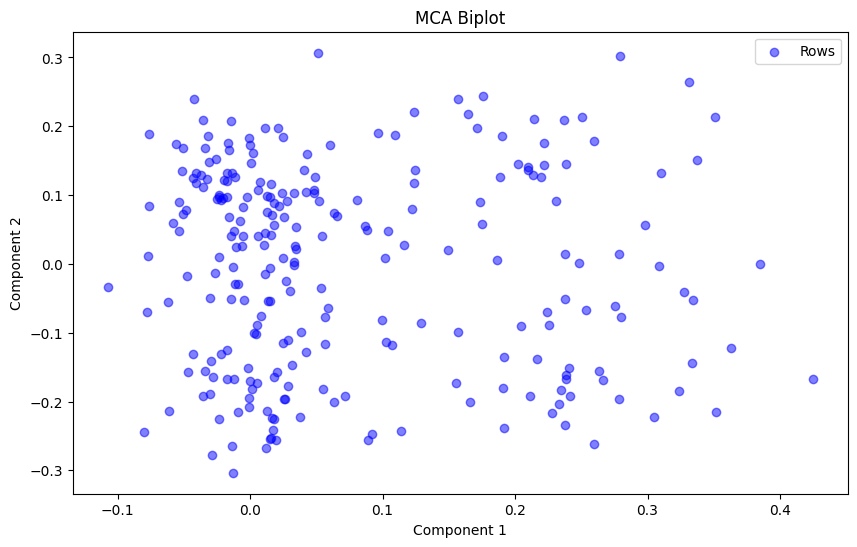

Varianza explicada por las dos primeras componentes: [0.17969925347807075, 0.059186066724192576, 0.04708539138628991, 0.042547040903466116, 0.03440947985728047]


In [482]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince

mca = prince.MCA(one_hot=False,n_components=5, random_state=42)

mca_fit = mca.fit(mcadata)

try:
    # Intenta acceder a la varianza explicada directamente
    explained_variance = mca.explained_inertia_
except AttributeError:
    # Si 'explained_inertia_' no está disponible, intenta métodos alternativos
    # Por ejemplo, usar eigenvalues_ para obtener una idea de la importancia de cada componente
    if hasattr(mca, 'eigenvalues_'):
        print("Eigenvalues:", mca.eigenvalues_)
    # O si necesitas calcular la varianza explicada manualmente
    if hasattr(mca, 'total_inertia_') and hasattr(mca, 'eigenvalues_'):
        explained_variance = [val / mca.total_inertia_ for val in mca.eigenvalues_]
        print("Calculated variance explained:", explained_variance)

# Asumiendo que mca_fit es tu objeto MCA ajustado
row_coordinates = mca_fit.row_coordinates(mcadata)
column_coordinates = mca_fit.column_coordinates(mcadata)

# Usando matplotlib para crear un biplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las coordenadas de las filas
ax.scatter(row_coordinates[0], row_coordinates[1], color='blue', alpha=0.5, label='Rows')

# Opcional: graficar las coordenadas de las columnas, ajusta los índices según tus datos
# ax.scatter(column_coordinates[0], column_coordinates[1], color='red', alpha=0.5, label='Columns')

ax.set_title('MCA Biplot')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()

plt.show()

# Imprimir la varianza explicada
print(f'Varianza explicada por las dos primeras componentes: {explained_variance}')

In [483]:
main_components_data = mca_fit.eigenvalues_summary
main_components_data

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.067,17.97%,17.97%
1,0.022,5.92%,23.89%
2,0.017,4.71%,28.60%
3,0.016,4.25%,32.85%
4,0.013,3.44%,36.29%


In [484]:
contributions = mca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [485]:
contrib_df.columns

RangeIndex(start=0, stop=5, step=1)

In [486]:
mcadata.shape

(249, 219)

In [401]:

contrib_df.to_csv('contributions_column_5comp_X_train.csv')

In [487]:

mca_xtest = mca.transform(mcadata)
contributions_xtest = mca.column_contributions_.style.format('{:.0%}')
contrib_xtest = pd.DataFrame(contributions_xtest.data)


In [490]:

# Seleccionamos variables de X_train con 85% de variabilidad acumulada

# Sorting values in descending order
sorted_column =contrib_df[0].sort_values(ascending=False)

# Creating a new DataFrame with variables that make up 85% of cumulative sum
cumulative_percent_threshold = .85
cumulative_sum = 0
selected_variables = []

for variable, value in sorted_column.items():
    cumulative_sum += float(value)
    selected_variables.append(variable)

    if cumulative_sum >= cumulative_percent_threshold:
        break

dataninos = mcadata[selected_variables]


In [491]:
dataninos.shape

(249, 47)

In [492]:
dataninos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 47 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype
---  ------                                                                                                                                                                      --------------  -----
 0   SDQ4                                                                                                                                                                        249 non-null    int64
 1    SUELE HACER LO QUE LE PIDEN LOS ADULTOS.                                                                                                                                   249 non-null    int64
 2    159. A MENUDO SE OFRECE PARA AYUDAR (A PADRES  MAESTROS  OTROS NIÑOS/AS).                    

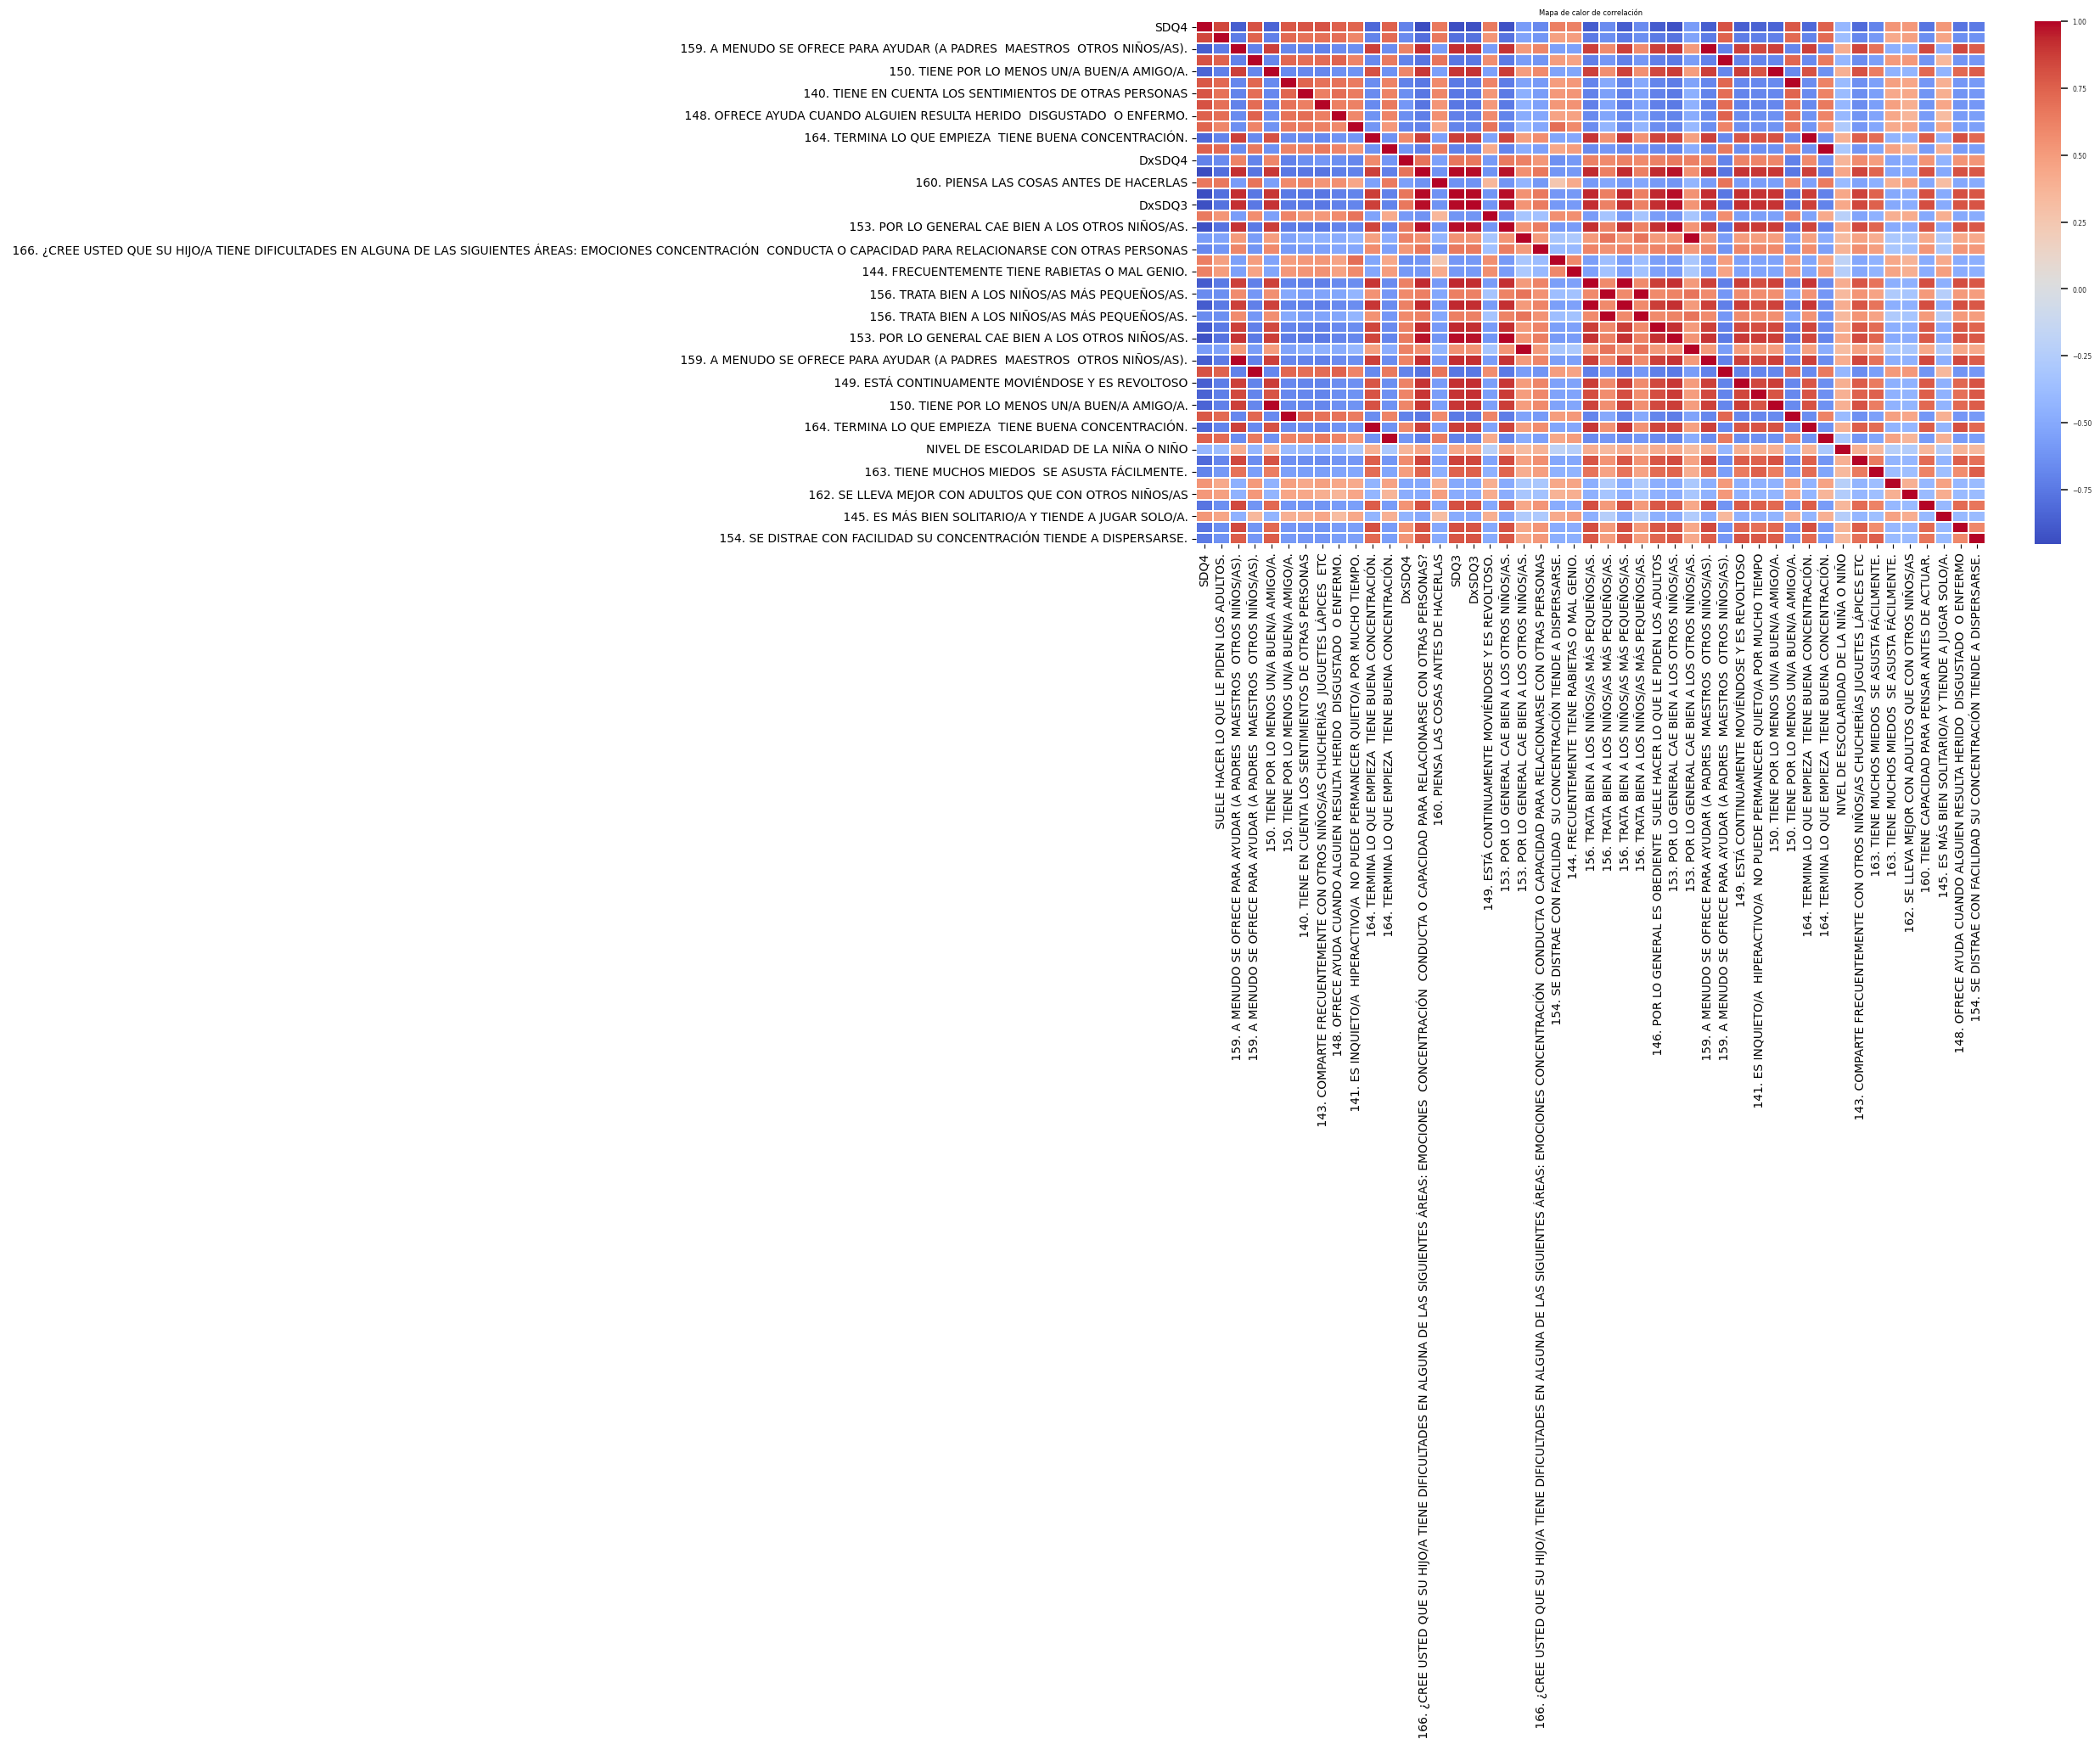

In [493]:
# Calculamos la matriz de correlación
correlation_matrix = dataninos.corr(method='pearson')

# Creamos un mapa de calor de la matriz de correlación

fig, ax = plt.subplots(figsize=(15, 8))
sns.set(font_scale=0.5)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.05)
plt.title('Mapa de calor de correlación')
plt.show()

# Justificacion y Conclusiones
One-Hot Encoding en Variables Binarias:
1. Representación Numérica: Las variables categóricas, incluidas las binarias, generalmente necesitan ser transformadas en una forma numérica para que puedan ser procesadas por algoritmos de aprendizaje automático. One-Hot Encoding es una técnica común que convierte categorías en vectores binarios.

2. Claridad de Modelo: One-Hot Encoding transforma cada categoría en una nueva variable binaria (0 o 1) que es fácil de entender y modelar. Esto es especialmente útil para las variables binarias, donde cada estado (por ejemplo, Sí/No) se convierte en una clara presencia o ausencia representada por 1 o 0.

3. Evitar Sesgo de Orden: A diferencia de la codificación ordinal, One-Hot Encoding no implica un orden o jerarquía entre las categorías. Esto es vital para las variables binarias, ya que no queremos que el modelo asuma un peso o importancia inherente entre las dos opciones.

Análisis de Componentes Múltiples (MCA):
1. Reducción de Dimensionalidad: Cuando se trata de datos categóricos, especialmente con muchas variables o categorías, el MCA es una técnica de reducción de dimensionalidad adecuada. Permite resumir la información en menos dimensiones, conservando la mayor cantidad posible de la varianza original.

2. Visualización de Datos: MCA puede facilitar la visualización de la estructura de los datos en un espacio de menor dimensión. Esto puede revelar patrones, agrupaciones o relaciones entre categorías que no serían evidentes en el espacio de alta dimensión.

3. Preparación para Análisis Posteriores: Al reducir la dimensionalidad, el MCA puede hacer que los datos sean más manejables para análisis posteriores, como clustering o modelos predictivos, y puede mejorar el rendimiento de estos algoritmos.

4. Interpretación Mejorada: El MCA proporciona componentes que son combinaciones lineales de las variables originales. Cada componente puede interpretarse en términos de las variables que contribuyen más a ese componente, lo que puede ofrecer insights cualitativos sobre los datos.

Conclusión:
Tomando en cuenta la naturaleza de nuestrs bases de datos la combinación de One-Hot Encoding para las variables binarias y MCA para la reducción de dimensionalidad y la interpretación de datos categóricos puede ser mucha ayuda . One-Hot Encoding asegura que las variables binarias sean tratadas adecuadamente sin introducir sesgos de orden, mientras que el MCA sintetiza la información de todas las variables categóricas (incluidas las binarias codificadas) en componentes principales que capturan la esencia de los datos. Juntas, estas técnicas nos ayudaran a preparar un conjunto de datos complejo y de alta dimensión para un análisis más profundo y para la construcción de modelos más efectivos.

**Referencias:**

Mukhiya, S. K., & Ahmed, U. (2020). *Hands-On Exploratory Data Analysis with Python*. Packt Publishing.

Sangani, R. (2021). *Dealing with features that have high cardinality*. Towards Data Science. https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b